In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MultiLabelBinarizer
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from skfuzzy import control as ctrl
import seaborn  as sns
from matplotlib import colors
from matplotlib.colors import ListedColormap


from sklearn.cluster import KMeans

c:\Users\Asus\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
dataset = pd.read_csv('data_market.csv', encoding='latin1')

In [3]:
for x_column in dataset :
    x_sales = dataset['Sales']
    x_profit = dataset['Profit']

    dataset['profit_margin'] = x_profit/x_sales

x_avg = dataset['profit_margin'].mean()

print(x_avg)

0.25022813688212764


In [4]:
dataset.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
profit_margin    0
dtype: int64

In [14]:
dataset

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State,profit_margin
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu,0.32
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu,0.20
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu,0.07
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu,0.10
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu,0.38
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu,0.06
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu,0.32
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu,0.36


# **K-means**

In [17]:
# X = dataset.drop(['Order ID','State','Profit','Sub Category'],axis=1)
X = dataset[['profit_margin','Customer Name','City']]

encoder = LabelEncoder()
columns_used = X.columns

In [18]:
len(dataset['City'].unique())

24

In [19]:
len(dataset['Category'].unique())

7

In [20]:
for col in columns_used :
    if(col != 'profit_margin') :
        X[col] = encoder.fit_transform(X[col])

for col in columns_used:
    if(col != 'profit_margin') :
        X[col] = X[col].round(2)

X.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6448\3366577744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
C:\Users\Asus\AppData\Local\Temp\ipykernel_6448\3366577744.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].round(2)


,profit_margin,Customer Name,City
0,0.32,12,21
1,0.20,37,8
2,0.07,14,13
3,0.10,15,4
4,0.39,28,12


<AxesSubplot:>

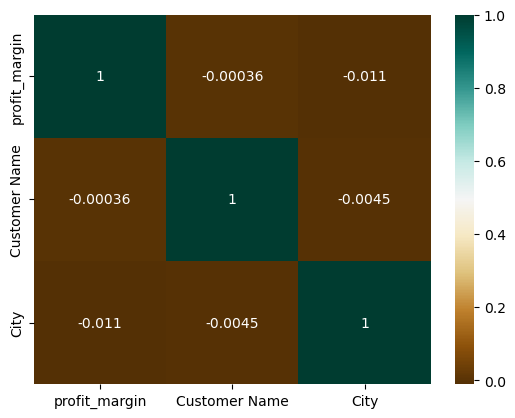

In [21]:
heatcol = X.corr()
sns.heatmap(heatcol,cmap="BrBG",annot=True)

In [22]:
kmeans = KMeans(n_clusters=3, random_state=42)
X['Cluster'] = kmeans.fit_predict(X)
X.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_6448\4044353206.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Cluster'] = kmeans.fit_predict(X)


,profit_margin,Customer Name,City,Cluster
0,0.32,12,21,0
1,0.20,37,8,1
2,0.07,14,13,0
3,0.10,15,4,0
4,0.39,28,12,2


In [23]:
score_avg = silhouette_score(X, X['Cluster'])
print(f"Score: {score_avg}")

Score: 0.39042900427804544


In [24]:
for index, row in X.iterrows():
    Clustered = ''
    if row['Cluster'] == 1:
        Clustered = 'High'
    elif row['Cluster'] == 2:
        Clustered = 'Medium'
    else:
        Clustered = 'Low'
        
    dataset.at[index, 'Cluster'] = Clustered

TypeError: can only concatenate str (not "int") to str

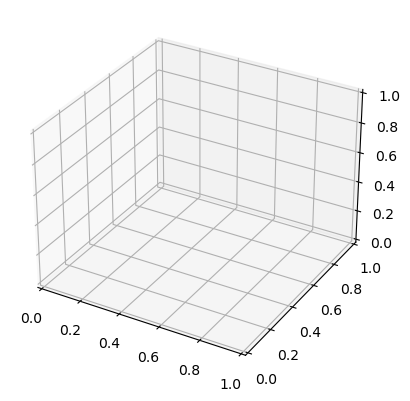

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for cluster_num in dataset['Cluster'].unique():
    cluster_data = dataset[dataset['Cluster'] == cluster_num]
    ax.scatter(
        cluster_data['profit_margin'], 
        cluster_data['Customer Name'], 
        cluster_data['City'], 
        label=f'Cluster {cluster_num + 1}')

ax.set_xlabel('Complexity')
ax.set_ylabel('Cost')
ax.set_zlabel('Time')
ax.legend()
plt.title('Hasil Clustering menggunakan K-Means (3D)')
plt.show()

In [ ]:
# dataset.to_csv('./data/market_cluster.csv', index=False)